In [21]:
import numpy as np
import utils.aa_one_hot_encoding as ohe
import pandas as pd

# Importing dataset / sequences
df = pd.read_csv('/Users/daniel/Desktop/PBL/Task 1/preprocessed/pp_task1_c50_15_70.tsv', sep='\t')

In [22]:
# One-Hot-Encoding the sequences
sequences = list(df['Sequence'])
encodings = ohe.batch_encode(sequences)
encodings_flat = ohe.batch_flatten(encodings)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score

labels = list(df['Enzyme'])

# Splitting the data
#X_train, X_test, y_train, y_test = train_test_split(encodings_flat, labels, test_size=0.2, random_state=123)

In [83]:
# Initializing the estimators
rf = RandomForestClassifier()
lr = LinearRegression()
logr = LogisticRegression()
svm = LinearSVC()

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
# Cross-Validation-Scores
X = encodings_flat
y = labels
skfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=41)
cv_rf = cross_val_score(rf, X, y, cv=skfold, scoring='accuracy')
cv_lr = cross_val_score(lr, X, y, cv=skfold, scoring='accuracy')
cv_logr = cross_val_score(logr, X, y, cv=skfold, scoring='accuracy')
cv_svm = cross_val_score(svm, X, y, cv=skfold, scoring='accuracy')

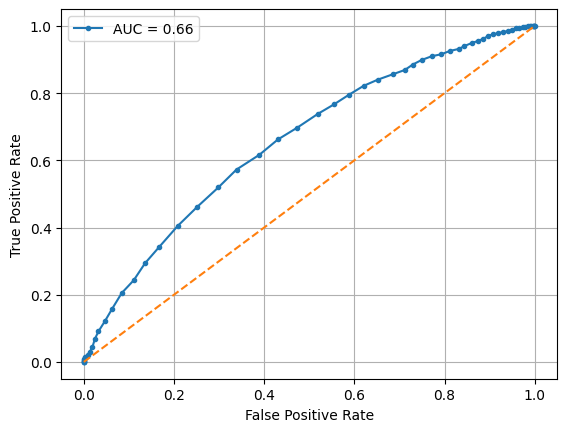

In [63]:
# Inference for test-set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

import matplotlib.pyplot as plt
fpr, tpr, threshholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", marker='.')
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

In [46]:
# Evaluating performance
print(confusion_matrix(y_test, y_pred))
print('MCC: ' + str(matthews_corrcoef(y_test, y_pred)))
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))
roc_auc_score()

[[1512 1143]
 [ 920 1803]]
MCC: 0.23267548223111534
Accuracy: 0.6164001487541837
Precision: 0.6120162932790224
Recall: 0.6621373485126698


(array([0.        , 0.43050847, 1.        ]),
 array([0.        , 0.66213735, 1.        ]),
 array([inf,  1.,  0.]))